# U.S. Medical Insurance Costs
####by Pamela Mishaw

In this Python project, I use the pandas, matplotlib, and numpy libraries to examine a .csv file containing data pertaining to medical insurance costs in the United States to determine possible relationships between the insurance cost and demographics of the population surveyed.

## Data Importation and Identification of Variables

In [67]:
# Package import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats


# CSV is read and displayed
insurance = pd.read_csv("insurance.csv")
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [68]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


After reading the .csv file into a dataframe, I am able to display the column titles and first few rows of the dataset. The "charges" column is assumed to be the annual insurance cost for the individual. 

In [69]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
# The dataset is checked for null values
insurance.isnull().values.any()

False

No null values were found in the dataframe and the output from the .describe() function did not suggest any missing data, either. Thus it appears that I do not have to take missing values into account in my analysis.


An aspect that piqued my curiosity is the relationship between region and insurance cost.

## Data Visualization

In [71]:
# Display total medical insurance costs by U.S. region
regional_cost = insurance.groupby("region").charges.sum().reset_index()

print(regional_cost)

      region       charges
0  northeast  4.343669e+06
1  northwest  4.035712e+06
2  southeast  5.363690e+06
3  southwest  4.012755e+06


The Southeast has the greatest total medical insurance cost of the four regions at a total of $5.6 million dollars. This difference can be best initially explored with a boxplot.

<Axes: xlabel='region', ylabel='charges'>

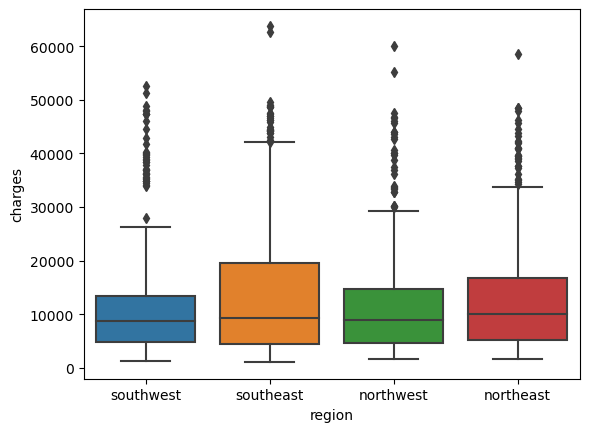

In [72]:
sns.boxplot(data = insurance, x = "region", y = "charges")

The median value of the medical insurance costs for each region are very similar and there is significant overlap in the IQRs. It appears that, when comparing the IQRs, the cost data coming from the southeast region has a greater percentage of individuals who pay a higher amount for medical insurance. The southeast region also has a significantly higher maximum medical insurance cost compared to the other regions.

Notably, the "charges" variable displays a greate number of high-valued outliers for each region. The Southeast shows the highest outlier, as well.

My next step is to investigate the other variables for each region to determine if these may be related to the difference in costs. 

In [ ]:
print((insurance.region.value_counts()) / len(insurance))

The Southeast represents a slightly higher percentage of the dataset which may be a contributor to the greater IQR and maximum values for this group-- a greater sample size allows for a greater chance of introducing a value that increases the range.

In [ ]:
sns.boxplot(data = insurance, x = "region", y = "age")

The median age, IQR, and range of the regions are almost identical so this does not appear to be an influence.

In [ ]:
sns.boxplot(data = insurance, x = "region", y = "bmi")

The median value of BMI for the Southeast is significantly higher than those of the other regions, a factor that is a known contributor to higher healthcare costs.

In [ ]:
plt.scatter(x = insurance.bmi, y = insurance.charges)

plt.title("BMI vs. Medical Insurance Cost") 
plt.xlabel("BMI")
plt.ylabel("Medical Insurance Cost ($)")

In [ ]:
corr_bmi_cost, p = pearsonr(insurance.bmi, insurance.charges)
print(corr_bmi_cost)

The scatterplot and Pearson correlation value suggest a weak positive correlation between bmi and medical insurance cost for the dataset as a whole.

In [ ]:
# Find number/proportion of smokers in each region.
smoker_region_cross = pd.crosstab(index = insurance.region, columns = insurance.smoker)
print(smoker_region_cross)

In [ ]:
smoker_prop = smoker_region_cross / len(insurance)
print(smoker_prop)

The Southeast region also had a greater number and percentage of respondents who declared themselves as smokers, another variable which adds to the healthcare cost burden of a population.

In [ ]:
sns.boxplot(data = insurance, x = "smoker", y = "charges")

In [ ]:
sns.countplot(x = "smoker", data = insurance)

This boxplot supports the theory of the greater number of smokers in the Southeast group relating to the higher medical insurance costs in the area-- the smoker group, though a small portion of the dataset overall (shown in the bar graph), has a much greater median medical insurance cost.

I am also interested in examining the relationship between sex and medical insurance cost.

In [ ]:
sns.countplot(x = "sex", data = insurance)

In [ ]:
sex_region_cross = pd.crosstab(index = insurance.region, columns = insurance.sex)
print(sex_region_cross)

In [ ]:
sns.boxplot(data = insurance, x = "sex", y = "charges")

The overall dataset and each geographic region have an almost equal split between the groups "male" and "female," as a good study should be. 
The median medical insurance cost for each of the sexes are very similar but the male part of the study group has a greater spread of values in the middle 50% of documented medical insurance costs and so the male portion of the dataset has a greater number of people with higher medical insurace costs.

In [ ]:
plt.scatter(x = insurance.age, y = insurance.charges)

plt.title("Age vs. Medical Insurance Cost") 
plt.xlabel("Age")
plt.ylabel("Medical Insurance Cost ($)")

In [ ]:
corr_age_cost, p = pearsonr(insurance.age, insurance.charges)
print(corr_age_cost)

There is a weak positive correlation between age and medical insurance costs.

## Conclusion

My exploration of the data revealed a greater overall medical insurance cost for those surveyed in the Southeast Region compared to other regions of the United States. This region also showed the greatest median BMI and number/proportion of smokers. The idea that these factors may be contributors to the higher medical insurance costs was supported by weak but positive correlation between BMI and health insurance cost as well as the greater median health insurance cost for the smoker group. 

The results suggest that greater efforts should be made in the Southeast to combat the obesity rates as compared to the other regions as well as devote more resources to reducing the number of smokers in order to relieve the region of its burden of healthcare costs.